In [1]:
%pip install numpy pandas seaborn matplotlib

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

from functions import *


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [2]:
goyal_welch_data = pd.read_csv('../macro_data/GoyalWelchPredictorData2022Monthly.csv', index_col=0)
goyal_welch_data.index = pd.to_datetime(goyal_welch_data.index, format='%Y%m')

for column in goyal_welch_data.columns:
    goyal_welch_data[column] = [float(str(x).replace(',', '')) for x in goyal_welch_data[column]]


In [3]:
goyal_welch_data

,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,Rfree,infl,ltr,corpr,svar,csp,CRSP_SPvw,CRSP_SPvwx
yyyymm,,,,,,,,,,,,,,,,,
1871-01-01,4.44,0.2600,0.4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1871-02-01,4.50,0.2600,0.4000,NaN,NaN,NaN,NaN,NaN,NaN,0.004967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1871-03-01,4.61,0.2600,0.4000,NaN,NaN,NaN,NaN,NaN,NaN,0.004525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1871-04-01,4.74,0.2600,0.4000,NaN,NaN,NaN,NaN,NaN,NaN,0.004252,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1871-05-01,4.86,0.2600,0.4000,NaN,NaN,NaN,NaN,NaN,NaN,0.004643,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,3955.00,64.8854,188.8067,0.227429,0.0263,0.0407,0.0515,0.0290,-0.009732,0.001900,-0.000354,-0.0421,-0.0293,0.003349,NaN,-0.040305,-0.042052
2022-09-01,3585.62,65.3183,187.0800,0.249478,0.0313,0.0459,0.0569,0.0352,-0.011292,0.001900,0.002151,-0.0769,-0.0526,0.004934,NaN,-0.091495,-0.092876
2022-10-01,3871.98,65.8531,182.3033,0.218935,0.0372,0.0510,0.0626,0.0398,-0.015252,0.002300,0.004056,-0.0139,-0.0103,0.006504,NaN,0.080248,0.079196


# SPY ticker 

In [4]:
spy_monthly_returns = pd.read_csv('../macro_data/spy_monthly_returns.csv', index_col=0)

spy_monthly_returns.index = pd.to_datetime(spy_monthly_returns.index, format='%Y-%m-%d')


In [5]:
start_date = goyal_welch_data.index.min() if goyal_welch_data.index.min() > spy_monthly_returns.index.min() else spy_monthly_returns.index.min()
end_date = goyal_welch_data.index.max() if goyal_welch_data.index.max() < spy_monthly_returns.index.max() else spy_monthly_returns.index.max()

start_date, end_date

(Timestamp('1993-03-01 00:00:00'), Timestamp('2022-12-01 00:00:00'))

In [6]:
filtered_spy_monthly_returns = spy_monthly_returns.loc[start_date:end_date]
filtered_goyal_welch_data = goyal_welch_data.loc[start_date:end_date]

filtered_goyal_welch_data['excess_returns'] = spy_monthly_returns['SPY'] - filtered_goyal_welch_data['Rfree']

filtered_goyal_welch_data['excess_returns']

/tmp/ipykernel_27400/1887622125.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_goyal_welch_data['excess_returns'] = spy_monthly_returns['SPY'] - filtered_goyal_welch_data['Rfree']


yyyymm
1993-03-01    0.008169
1993-04-01    0.019998
1993-05-01   -0.027787
1993-06-01    0.024469
1993-07-01    0.001208
                ...   
2022-08-01    0.090187
2022-09-01   -0.042702
2022-10-01   -0.094746
2022-11-01    0.078376
2022-12-01    0.052292
Name: excess_returns, Length: 358, dtype: float64

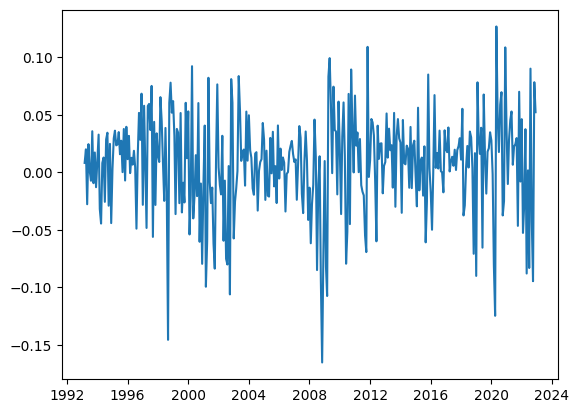

In [7]:
plt.plot(filtered_goyal_welch_data['excess_returns'])

Text(0.5, 1.0, 'leverage = 0.6')

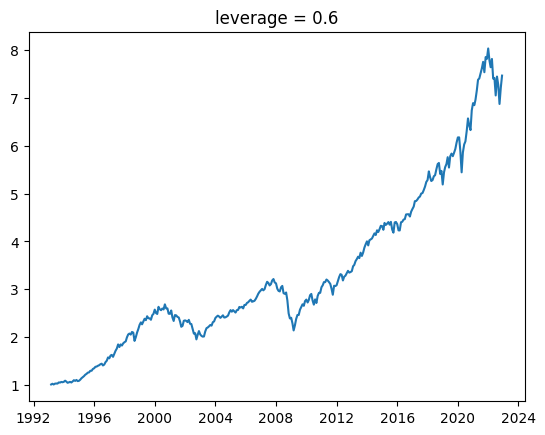

In [8]:
leverage = 0.6
strategy_returns = 1 + filtered_goyal_welch_data.Rfree + leverage * filtered_goyal_welch_data.excess_returns
plt.plot(np.cumprod(strategy_returns))
plt.title(f'leverage = {leverage}')

In [9]:
cleaned_data = filtered_goyal_welch_data.drop(columns=['csp']).fillna(0)

In [10]:
cleaned_data[['Index', 'D12', 'E12']] = (cleaned_data[['Index', 'D12', 'E12']] / cleaned_data[['Index', 'D12', 'E12']].shift(1)).fillna(0)
print(cleaned_data)

               Index       D12       E12       b/m     tbl     AAA     BAA  \
yyyymm                                                                       
1993-03-01  0.000000  0.000000  0.000000  0.333614  0.0295  0.0758  0.0815   
1993-04-01  0.974583  1.001178  0.991431  0.334350  0.0287  0.0746  0.0814   
1993-05-01  1.022717  1.001169  0.991357  0.324882  0.0296  0.0743  0.0821   
1993-06-01  1.000755  1.001175  0.991282  0.325931  0.0307  0.0733  0.0807   
1993-07-01  0.994673  0.999896  1.018624  0.323777  0.0304  0.0717  0.0793   
...              ...       ...       ...       ...     ...     ...     ...   
2022-08-01  0.957560  1.006717  0.990938  0.227429  0.0263  0.0407  0.0515   
2022-09-01  0.906604  1.006672  0.990855  0.249478  0.0313  0.0459  0.0569   
2022-10-01  1.079863  1.008188  0.974467  0.218935  0.0372  0.0510  0.0626   
2022-11-01  1.053753  1.008123  0.973799  0.207182  0.0415  0.0490  0.0607   
2022-12-01  0.941029  1.008056  0.973093  0.216199  0.0425  0.04

In [11]:
signal_columns = ['Index', 'D12', 'E12', 'b/m', 'tbl', 'AAA', 'BAA', 'lty', 'ntis',
        'Rfree', 'infl', 'ltr', 'corpr', 'svar']

data_for_signals = cleaned_data[signal_columns].shift(1).fillna(0) # shifting of signals happens here !
labels = cleaned_data.excess_returns.values.reshape(-1, 1)
data_for_signals['infl'] = data_for_signals['infl'].shift(1).fillna(0) # this is because inflation is actually published later
signals = data_for_signals.values
data_for_signals.shape, data_for_signals.columns

((358, 14),
 Index(['Index', 'D12', 'E12', 'b/m', 'tbl', 'AAA', 'BAA', 'lty', 'ntis',
        'Rfree', 'infl', 'ltr', 'corpr', 'svar'],
       dtype='object'))

In [12]:
data_for_signals

,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,Rfree,infl,ltr,corpr,svar
yyyymm,,,,,,,,,,,,,,
1993-03-01,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.000000,0.0000,0.000000,0.0000,0.0000,0.000000
1993-04-01,0.000000,0.000000,0.000000,0.333614,0.0295,0.0758,0.0815,0.0702,0.037106,0.0025,0.000000,0.0021,0.0025,0.001005
1993-05-01,0.974583,1.001178,0.991431,0.334350,0.0287,0.0746,0.0814,0.0701,0.039813,0.0024,0.003494,0.0072,0.0052,0.001005
1993-06-01,1.022717,1.001169,0.991357,0.324882,0.0296,0.0743,0.0821,0.0701,0.040255,0.0022,0.002786,0.0047,0.0020,0.000817
1993-07-01,1.000755,1.001175,0.991282,0.325931,0.0307,0.0733,0.0807,0.0668,0.041154,0.0025,0.001389,0.0449,0.0293,0.000574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,1.091116,1.006762,0.991019,0.218187,0.0223,0.0406,0.0521,0.0290,-0.006121,0.0008,0.013736,0.0270,0.0324,0.003188
2022-09-01,0.957560,1.006717,0.990938,0.227429,0.0263,0.0407,0.0515,0.0290,-0.009732,0.0019,-0.000118,-0.0421,-0.0293,0.003349
2022-10-01,0.906604,1.006672,0.990855,0.249478,0.0313,0.0459,0.0569,0.0352,-0.011292,0.0019,-0.000354,-0.0769,-0.0526,0.004934


In [13]:
normalize_raw_data = True
cheat_and_use_future_data = False  # set to True if you want to have
#our fun experiment to show how even know a bit about the future can drastically imprpve performance

shrinkage_list = [0.00000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

split = int(signals.shape[0] / 2)
train_labels = labels[:split]
test_labels = labels[split:]

if normalize_raw_data:
    signals[:split, :], normalization_based_on_train = normalize(signals[:split], use_std=False)
    # this is our fun experiment to show how even know a bit about the future can drastically imprpve performance
    if cheat_and_use_future_data:
      signals[split:, :] = normalize(signals[split:, :])[0]
    else:
      signals[split:, :] = normalize(signals[split:, :],
                                     ready_normalization=normalization_based_on_train)[0]

beta_estimate_using_train_sample, oos_predictions = ridge_regr(signals=signals[:split, :],
                                                                labels=train_labels,
                                                                future_signals=signals[split:, :],
                                                                shrinkage_list=shrinkage_list)

oos_predictions = pd.DataFrame(oos_predictions, index=cleaned_data.index[split:], columns = shrinkage_list)
print(oos_predictions)

            1.000000e-08  1.000000e-05  1.000000e-04  1.000000e-03  \
yyyymm                                                               
2008-02-01     -0.064151     -0.063679     -0.059950     -0.040671   
2008-03-01     -0.036595     -0.036563     -0.036237     -0.030154   
2008-04-01     -0.012441     -0.013046     -0.016981     -0.023773   
2008-05-01      0.047686      0.047927      0.048962      0.035400   
2008-06-01      0.017728      0.016768      0.010441     -0.005298   
...                  ...           ...           ...           ...   
2022-08-01      0.083508      0.082385      0.074100      0.039513   
2022-09-01     -0.045414     -0.044550     -0.038419     -0.013665   
2022-10-01     -0.100597     -0.098631     -0.084923     -0.037824   
2022-11-01      0.063825      0.062860      0.055492      0.025705   
2022-12-01      0.039521      0.040085      0.043508      0.036929   

            1.000000e-02  1.000000e-01  1.000000e+00  1.000000e+01  \
yyyymm             

In [14]:
pd.DataFrame(beta_estimate_using_train_sample, columns=shrinkage_list, index=data_for_signals.columns)

,1.000000e-08,1.000000e-05,1.000000e-04,1.000000e-03,1.000000e-02,1.000000e-01,1.000000e+00,1.000000e+01,1.000000e+02,1.000000e+03
Index,1.053777,1.036723,0.911419,0.452033,0.084337,0.011520,0.002260,0.000340,0.000036,3.658445e-06
D12,-0.854066,-0.827468,-0.656172,-0.258246,-0.040545,-0.002020,0.001062,0.000239,0.000027,2.685203e-06
E12,-0.101634,-0.111660,-0.163109,-0.133601,-0.024134,-0.000755,0.001022,0.000218,0.000024,2.438887e-06
b/m,0.007651,0.007598,0.005774,-0.006479,-0.011584,-0.002363,0.000255,0.000084,0.000010,9.744669e-07
tbl,-0.011394,-0.011405,-0.011478,-0.012143,-0.000068,0.001706,0.000647,0.000107,0.000012,1.162041e-06
AAA,-0.176610,-0.163146,-0.104361,-0.044262,-0.015398,-0.001846,0.000477,0.000122,0.000014,1.389397e-06
BAA,0.177370,0.158799,0.062907,-0.047416,-0.021121,-0.002452,0.000496,0.000133,0.000015,1.514061e-06
lty,0.004766,0.008076,0.033928,0.057347,0.008587,0.000930,0.000666,0.000131,0.000014,1.453265e-06
ntis,0.012802,0.012636,0.012080,0.012816,0.005460,-0.000309,0.000209,0.000057,0.000006,6.479856e-07
Rfree,0.012389,0.011788,0.009629,0.016129,0.008141,0.002151,0.000533,0.000080,0.000008,8.541985e-07


In [15]:
market_timing_returns = oos_predictions * test_labels.reshape(-1, 1)
print(market_timing_returns) # we have one timing return for each value of z

            1.000000e-08  1.000000e-05  1.000000e-04  1.000000e-03  \
yyyymm                                                               
2008-02-01      0.003962      0.003933      0.003703      0.002512   
2008-03-01      0.001008      0.001007      0.000998      0.000831   
2008-04-01      0.000134      0.000140      0.000182      0.000255   
2008-05-01      0.002187      0.002198      0.002246      0.001624   
2008-06-01      0.000238      0.000225      0.000140     -0.000071   
...                  ...           ...           ...           ...   
2022-08-01      0.007531      0.007430      0.006683      0.003564   
2022-09-01      0.001939      0.001902      0.001641      0.000584   
2022-10-01      0.009531      0.009345      0.008046      0.003584   
2022-11-01      0.005002      0.004927      0.004349      0.002015   
2022-12-01      0.002067      0.002096      0.002275      0.001931   

            1.000000e-02  1.000000e-01  1.000000e+00  1.000000e+01  \
yyyymm             

In [16]:
cleaned_data = pd.concat([cleaned_data, market_timing_returns], axis=1)

In [17]:
tmp = cleaned_data[['excess_returns'] + shrinkage_list].iloc[split:]
tmp = tmp / tmp.std()
sr = sharpe_ratio(tmp)

Text(0.5, 1.0, 'SR=[0.59 1.76 1.76 1.79 1.53 0.97 0.93 1.11 1.12 1.12 1.12]')

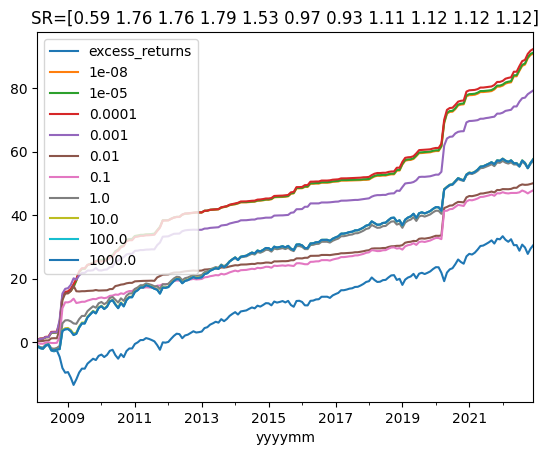

In [18]:
tmp.cumsum().plot()
plt.title(f'SR={sr.values.flatten()}')

In [19]:
tstat = regression_with_tstats(predicted_variable=tmp[1.], explanatory_variables=tmp['excess_returns'])
print(tstat)

const             2.7
excess_returns    1.3
Name: z, dtype: float64


In [20]:
P = 50000
d = 14
scale = 1.
omega = scale * np.sqrt(2) * np.random.randn(d, P) / np.sqrt(d)
ins_sin = np.sqrt(2) * np.sin(signals @ omega) # this is n times P
ins_cos = np.sqrt(2) * np.cos(signals @ omega) # this is also n times P
random_features = np.append(ins_sin, ins_cos, axis=1) # this is n times (2P)

In [21]:
random_features.shape

(358, 100000)

In [22]:
split = int(signals.shape[0] / 2)

labels = cleaned_data.excess_returns.values.reshape(-1, 1)

train_labels = labels[:split]
test_labels = labels[split:]

beta_estimate_using_train_sample, oos_predictions = ridge_regr(signals=random_features[:split, :],
                                                                labels=train_labels,
                                                                future_signals=random_features[split:, :],
                                                                shrinkage_list=shrinkage_list)

oos_predictions = pd.DataFrame(oos_predictions, index=cleaned_data.index[split:], columns = shrinkage_list)
print(oos_predictions)

            1.000000e-08  1.000000e-05  1.000000e-04  1.000000e-03  \
yyyymm                                                               
2008-02-01     -0.008725     -0.018915     -0.043750     -0.062153   
2008-03-01      0.019637      0.006776     -0.024218     -0.041760   
2008-04-01      0.089963      0.081054      0.035699     -0.000511   
2008-05-01      0.051929      0.038365      0.031805      0.030542   
2008-06-01     -0.005864      0.005367      0.003241      0.002159   
...                  ...           ...           ...           ...   
2022-08-01      0.214111      0.170100      0.102985      0.062402   
2022-09-01     -0.037423     -0.053808     -0.064906     -0.063058   
2022-10-01     -0.086639     -0.107010     -0.123389     -0.113538   
2022-11-01      0.084325      0.065165      0.045004      0.048200   
2022-12-01      0.063987      0.040975      0.021705      0.023438   

            1.000000e-02  1.000000e-01  1.000000e+00  1.000000e+01  \
yyyymm             

Text(0.5, 1.0, 'sr=excess_returns    0.59\n0.0               1.76\n0.00001           1.76\n0.0001            1.79\n0.001             1.53\n0.01              0.97\n0.1               0.93\n1.0               1.11\n10.0              1.12\n100.0             1.12\n1000.0            1.12\n1e-08_complex     0.78\n1e-05_complex     0.91\n0.0001_complex    1.28\n0.001_complex     1.70\n0.01_complex      2.37\n0.1_complex       2.64\n1.0_complex       2.62\n10.0_complex      2.47\n100.0_complex     1.60\n1000.0_complex    1.41\nmean              2.06\ndtype: float64')

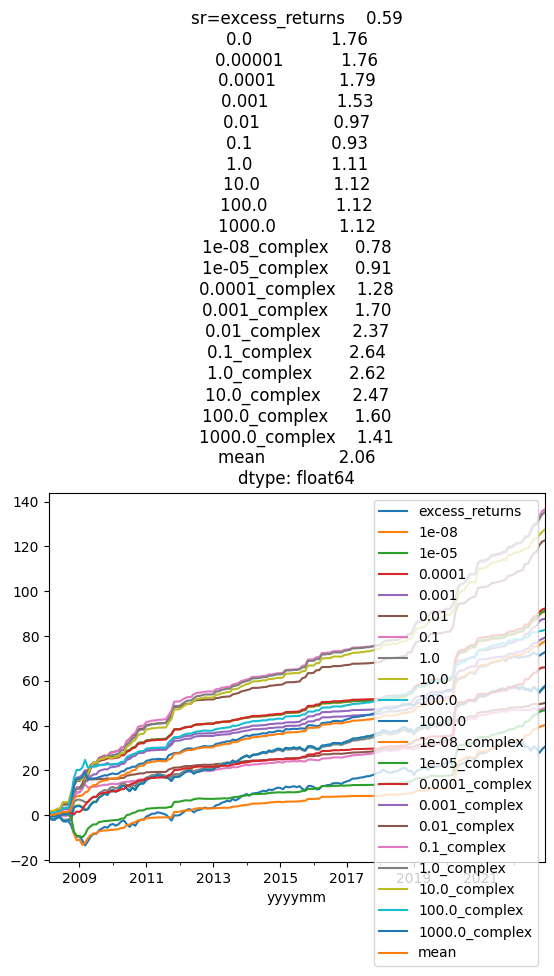

In [23]:
market_timing_returns_complex = oos_predictions * test_labels
market_timing_returns_complex.columns = [f'{x}_complex' for x in market_timing_returns_complex.columns]

cleaned_data = pd.concat([cleaned_data, market_timing_returns_complex], axis=1)

# 'excess_returns' are just market returns; it is important we keep them
# shrinkage_list: these are the columns corresponding to the simple linear model with just 13 predictors
tmp = cleaned_data[['excess_returns'] + shrinkage_list + list(market_timing_returns_complex.columns)].iloc[split:, :]
tmp = tmp / tmp.std()
tmp['mean'] = tmp.mean(1)
sr = sharpe_ratio(tmp)
tmp.cumsum().plot()
plt.title(f'sr={sr}')
#plt.savefig(os.path.join(folder, 'performance_pl9ot.jpeg'))

In [24]:
cleaned_data.corr()[0.0001]

Index             0.033848
D12              -0.210796
E12              -0.242273
b/m               0.055398
tbl               0.022917
AAA               0.111710
BAA               0.278883
lty              -0.012109
ntis             -0.198651
Rfree             0.017260
infl             -0.375436
ltr               0.180238
corpr             0.208334
svar              0.449640
CRSP_SPvw         0.035832
CRSP_SPvwx        0.034077
excess_returns   -0.262660
0.0               0.994984
0.00001           0.996188
0.0001            1.000000
0.001             0.966148
0.01              0.859398
0.1               0.808612
1.0               0.653716
10.0              0.555900
100.0             0.542740
1000.0            0.541384
1e-08_complex     0.148633
1e-05_complex     0.268559
0.0001_complex    0.663770
0.001_complex     0.872893
0.01_complex      0.822035
0.1_complex       0.651953
1.0_complex       0.678212
10.0_complex      0.695331
100.0_complex     0.778189
1000.0_complex    0.709429
N

In [25]:
tstats = regression_with_tstats(predicted_variable=tmp['0.001_complex'], explanatory_variables=tmp[['excess_returns', 0.0001]])
print(tstats)

const             0.8
excess_returns   -1.4
0.0001            4.0
Name: z, dtype: float64
